# Part 2 - Crude Oil Export in CAD, GDP Contribution of Oil Export from CA
----

In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime

In [3]:
# List all related data files path
table_4_file = "Resources/Raw Data/Table 4 - Canadian Oil Export by Type.xls"
table_8_file = "Resources/Raw Data/Table 8 - Canada GDP Data.csv"
table_6_file = "Resources/Raw Data/Table 6 - USD-CAD Exchange Rate (API Output).csv"


## Table 4 - Canadian Oil Export by Type
----

In [4]:
# Read excel file and display
table_4_df = pd.read_excel(table_4_file)
table_4_df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crude Oil Exports - Summary by Type - Monthly\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Light\n(> 30 API),NaN,NaN,Medium\n(25 - 30 API),Heavy\n(<25 API),NaN,NaN,NaN,NaN
5,Period:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,NaN,NaN
6,2000-01-01,NaN,NaN,102223,NaN,NaN,25889.1,90128.1,NaN,218240,NaN,NaN
7,2000-02-01,NaN,NaN,104746,NaN,NaN,27786.6,81843.1,NaN,214376,NaN,NaN
8,2000-03-01,NaN,NaN,101307,NaN,NaN,26496,91580.9,NaN,219384,NaN,NaN
9,2000-04-01,NaN,NaN,106014,NaN,NaN,25062.3,78239.9,NaN,209316,NaN,NaN


In [5]:
# Take any row of needed data, drop all NaN values, then get the list of columns
sample_row = table_4_df.iloc[6]
list_columns = sample_row.dropna().index

# Parse the list of needed columns to get the clean df
cleaned_table_4_df = table_4_df[list_columns]

# Drop all rows with NaN data, reset index and rename columns
cleaned_table_4_df.dropna(how = "any", inplace = True)
cleaned_table_4_df.reset_index(drop = True, inplace = True)
cleaned_table_4_df.columns = ["Date", "Light Oil", "Medium Oil", "Heavy Oil", "Oil Export (m3 per day)"]
cleaned_table_4_df["Date"] = cleaned_table_4_df["Date"].str.replace(" ", "")
cleaned_table_4_df.head()

,Date,Light Oil,Medium Oil,Heavy Oil,Oil Export (m3 per day)
0,2000-01-01,102223,25889.1,90128.1,218240
1,2000-02-01,104746,27786.6,81843.1,214376
2,2000-03-01,101307,26496,91580.9,219384
3,2000-04-01,106014,25062.3,78239.9,209316
4,2000-05-01,108434,31567.8,97939.7,237941


In [7]:
# Get data since 2005
final_table_4_df = cleaned_table_4_df.loc[cleaned_table_4_df["Date"] >= "2005-01-01"].reset_index(drop = True)
final_table_4_df.head()

,Date,Light Oil,Medium Oil,Heavy Oil,Oil Export (m3 per day)
0,2005-01-01,75902.4,16483.5,145993,238379
1,2005-02-01,83087.1,16602.9,136865,236555
2,2005-03-01,68671.6,17079.5,145111,230862
3,2005-04-01,75845.5,18255.4,152258,246359
4,2005-05-01,99545.6,21165.5,158121,278832


In [6]:
# Export to csv
final_table_4_df.to_csv("Resources/Clean Data/Table 4.csv", index = False)

## Table 8 - Canada GDP Data
----

In [7]:
# Read csv and Cleaning the Canada GDP csv
table_8_df = pd.read_csv(table_8_file)
table_8_df.head(20)

,"Gross domestic product (GDP) at basic prices, by industry, monthly, industry detail (x 1,000,000) 1 2",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248
0,Monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table: 36-10-0434-04 (formerly CANSIM 379-0031),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geography: Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Seasonally adjusted at annual rates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Chained (2012) dollars 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,North American Industry Classification System ...,Jan-00,Feb-00,Mar-00,Apr-00,May-00,Jun-00,Jul-00,Aug-00,Sep-00,...,19-Nov,19-Dec,20-Jan,20-Feb,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug
8,NaN,Dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Agriculture, forestry, fishing and hunting [11]","28,095","27,638","28,461","28,216","28,397","28,848","28,793","28,054","27,649",...,"41,436","40,718","40,665","41,001","41,397","41,228","41,985","42,196","42,008","42,010"


In [8]:
# Drop all NaN values rows
new_table_8_df = table_8_df.dropna(axis = 0, how = "any")

# Filter out the columns which contain word "Oil"
table_8_filter_1 = new_table_8_df[new_table_8_df.columns[0]].str.contains("NAICS")
table_8_filter_2 = new_table_8_df[new_table_8_df.columns[0]].str.contains("Oil")
new_table_8_df = new_table_8_df[table_8_filter_1].append(new_table_8_df[table_8_filter_2]).reset_index(drop = True)
new_table_8_df

,"Gross domestic product (GDP) at basic prices, by industry, monthly, industry detail (x 1,000,000) 1 2",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248
0,North American Industry Classification System ...,Jan-00,Feb-00,Mar-00,Apr-00,May-00,Jun-00,Jul-00,Aug-00,Sep-00,...,19-Nov,19-Dec,20-Jan,20-Feb,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug
1,Oil and gas extraction [211],"69,825","69,154","68,513","69,640","69,412","69,491","68,357","68,179","68,884",...,"109,386","110,088","109,236","109,549","109,250","103,118","99,818","100,173","97,703","93,892"
2,Oil and gas extraction (except oil sands) [21...,..,..,..,..,..,..,..,..,..,...,"55,738","53,935","52,645","53,965","53,619","49,829","48,269","50,583","49,222","49,122"
3,Oil sands extraction [21114],..,..,..,..,..,..,..,..,..,...,"54,466","56,914","57,321","56,351","56,388","53,982","52,220","50,325","49,194","45,508"


In [9]:
# Only get the total oil and gas contribution to GDP
oil_table_8_df = new_table_8_df.iloc[0:2]
oil_table_8_df.set_index(oil_table_8_df.columns[0], inplace = True)
oil_table_8_df.index.name = None

# Transpose the dataframe and reset its index
clean_table_8_df = oil_table_8_df.T.reset_index(drop = True)

# Rename columns
clean_table_8_df.columns = ["Date", "Oil and gas extraction (million dollars)"]

# Remove rows with year 2000
table_8_filter_3 = clean_table_8_df["Date"].str.contains("00")
final_table_8_df = clean_table_8_df[~table_8_filter_3]
final_table_8_df["Date"] = pd.to_datetime(final_table_8_df["Date"], format = "%y-%b")

# Get only the data since 2005
final_table_8_df = final_table_8_df[final_table_8_df["Date"]>= "2005-01-01"].reset_index(drop = True)

# Change the number to float
final_table_8_df["Oil and gas extraction (million dollars)"] = \
    final_table_8_df["Oil and gas extraction (million dollars)"].str.replace(",", "").astype(float)

final_table_8_df.head(10)

,Date,Oil and gas extraction (million dollars)
0,2005-01-01,75199.0
1,2005-02-01,73681.0
2,2005-03-01,72409.0
3,2005-04-01,74726.0
4,2005-05-01,75464.0
5,2005-06-01,74848.0
6,2005-07-01,74822.0
7,2005-08-01,75521.0
8,2005-09-01,76413.0
9,2005-10-01,77135.0


In [10]:
# Export to csv
final_table_8_df.to_csv("Resources/Clean Data/Table 8.csv", index = False)

# Transformation from processed dataset
----

In [10]:
# Read table 4, 8 and exchange rate csvs
tab_4_df = pd.read_csv("Resources/Clean Data/Table 4.csv")
tab_8_df = pd.read_csv("Resources/Clean Data/Table 8.csv")
exchange_df = pd.read_csv("Resources/Clean Data/Monthly_Exchange_Rate.csv")

# Filter required columns
tab_4_df["Oil Export (x1000 m3 per day)"] = tab_4_df["Oil Export (m3 per day)"] / 1000
tab_4_df = tab_4_df[["Date", "Oil Export (x1000 m3 per day)"]]
tab_8_df["Oil and gas extraction (Billion CA Dollars)"] = tab_8_df["Oil and gas extraction (million dollars)"] / 1000
tab_8_df = tab_8_df[["Date", "Oil and gas extraction (Billion CA Dollars)"]]
exchange_df = exchange_df[["Date", "CAD/USD"]]

In [11]:
# Merge all three csvs
tab_4_8_df = pd.merge(tab_4_df, tab_8_df, on = "Date", how = "left")
can_df = pd.merge(tab_4_8_df, exchange_df, on = "Date", how = "left")
can_df.head()

,Date,Oil Export (x1000 m3 per day),Oil and gas extraction (Billion CA Dollars),CAD/USD
0,2005-01-01,238.37882,75.199,0.829739
1,2005-02-01,236.55508,73.681,0.806476
2,2005-03-01,230.86226,72.409,0.810499
3,2005-04-01,246.35910,74.726,0.823526
4,2005-05-01,278.83247,75.464,0.800259


In [12]:
# Export csv
can_df.to_csv("Transformed Data/Part 2.csv", index = False)

# Plotting for Canada Data
----

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [6]:
# Read Canada data file
can_df = pd.read_csv("Transformed Data/Part 2.csv")
can_df["Date"] = pd.to_datetime(can_df["Date"])
can_df.head()

,Date,Oil Export (x1000 m3 per day),Oil and gas extraction (Billion CA Dollars),CAD/USD
0,2005-01-01,238.37882,75.199,0.829739
1,2005-02-01,236.55508,73.681,0.806476
2,2005-03-01,230.86226,72.409,0.810499
3,2005-04-01,246.35910,74.726,0.823526
4,2005-05-01,278.83247,75.464,0.800259


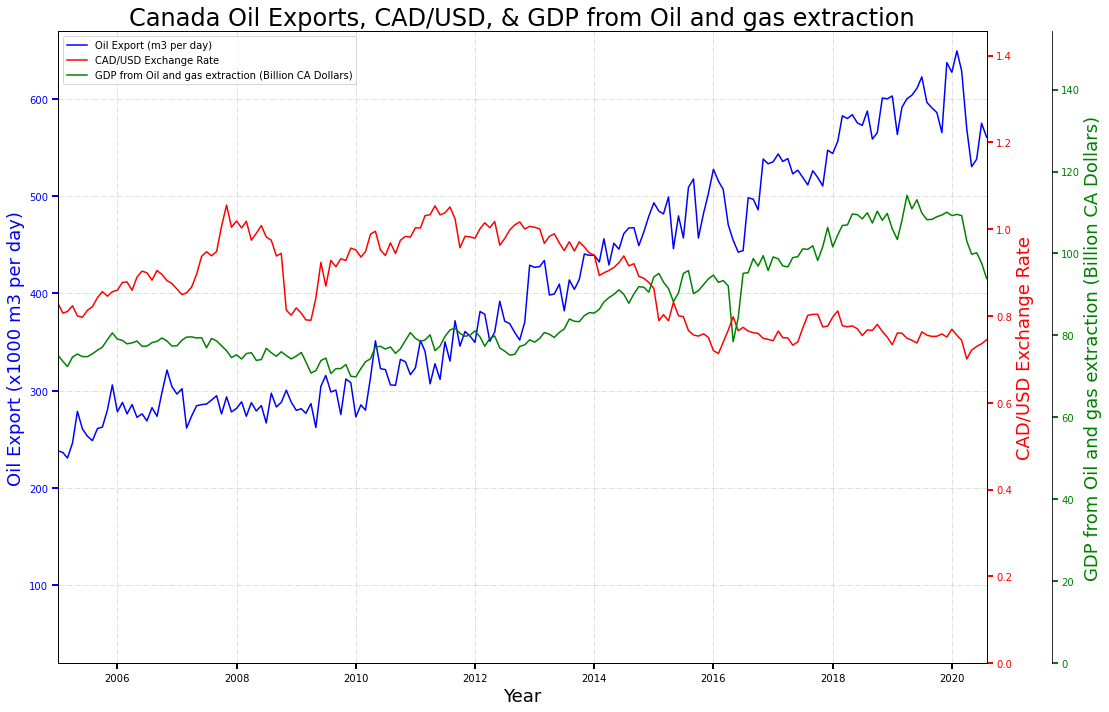

In [7]:
# Assigning x and y axes from dataframe
x_axis = can_df["Date"]
y_axis_1 = can_df["Oil Export (x1000 m3 per day)"]
y_axis_2 = can_df["CAD/USD"]
y_axis_3 = can_df["Oil and gas extraction (Billion CA Dollars)"]

# Create subplots
fig, host = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.5)

# Create twining 2nd y-axis
par1 = host.twinx()
par2 = host.twinx()

# Set position for the 2nd y-axis
par2.spines["right"].set_position(("axes", 1.07))
par2.spines["right"].set_visible(True)

# Start plotting data
p1, = host.plot(x_axis, y_axis_1, "b-", label="Oil Export (m3 per day)")
p2, = par1.plot(x_axis, y_axis_2, "r-", label="CAD/USD Exchange Rate")
p3, = par2.plot(x_axis, y_axis_3, "g-", label="GDP from Oil and gas extraction (Billion CA Dollars)")

# Setting all related elements, including labels, limits, etc.
host.set_title("Canada Oil Exports, CAD/USD, & GDP from Oil and gas extraction", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(20, max(y_axis_1) + 20)
par1.set_ylim(0, max(y_axis_2) + 0.4)
par2.set_ylim(0, max(y_axis_3) + 40)

host.set_xlabel("Year", fontsize=18)
host.set_ylabel("Oil Export (x1000 m3 per day)", fontsize=18)
par1.set_ylabel("CAD/USD Exchange Rate", fontsize=18)
par2.set_ylabel("GDP from Oil and gas extraction (Billion CA Dollars)", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

# Create legend and grid, save figure
host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
host.grid(linestyle='-.', alpha = 0.5)
plt.savefig("Plots/Question 2 & 4 - CAD Exchange Rate vs. Oil Export and GDP contribution of Oil Extraction.png", bbox_inches='tight', facecolor='w')
plt.show()

In [8]:
# Correlation matrix
can_df.corr()

,Oil Export (x1000 m3 per day),Oil and gas extraction (Billion CA Dollars),CAD/USD
Oil Export (x1000 m3 per day),1.000000,0.945954,-0.638324
Oil and gas extraction (Billion CA Dollars),0.945954,1.000000,-0.711512
CAD/USD,-0.638324,-0.711512,1.000000


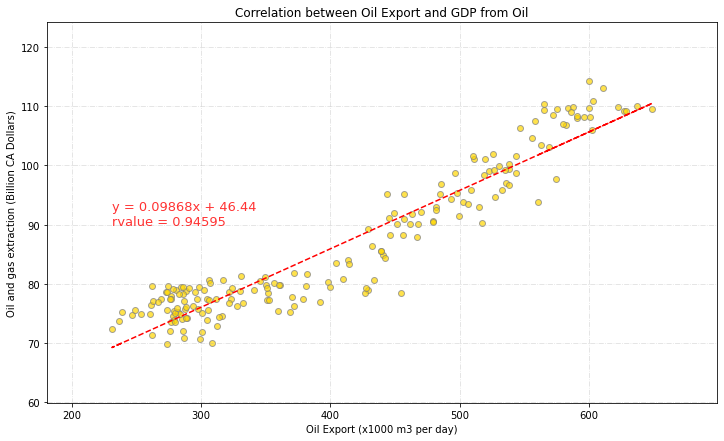

In [66]:
# Study the strong correlation of GDP from oil extraction and Oil Export
slope, intercept, rvalue, _, _ = linregress(y_axis_1, y_axis_3)
eq = "y = " + str(round(slope, 5)) + "x + " + str(round(intercept, 2)) + "\nrvalue = " + str(round(rvalue, 5))

# Simulation of regress line
regress_line = slope * y_axis_1 + intercept

# Create scatter plotting, annotate the equation, some design elements
plt.figure(figsize=(12,7))
plt.scatter(y_axis_1, y_axis_3, alpha = 0.7, edgecolors = "grey", facecolors = "gold")
plt.title("Correlation between Oil Export and GDP from Oil")
plt.xlabel("Oil Export (x1000 m3 per day)")
plt.ylabel("Oil and gas extraction (Billion CA Dollars)")
plt.xlim(min(y_axis_1) - 50, max(y_axis_1) + 50)
plt.ylim(min(y_axis_3) - 10, max(y_axis_3) + 10)
plt.plot(y_axis_1, regress_line, "r--")
plt.annotate(eq, (min(y_axis_1), 90), fontsize=13, color='r', alpha = 0.8)
plt.grid(linestyle='-.', alpha = 0.4)
plt.savefig("Plots/Question 2 & 4 - Correlation between Oil Export and GDP contribution of Oil Extraction.png", bbox_inches='tight', facecolor='w')
plt.show()